<a href="https://colab.research.google.com/github/misiek98/cv/blob/master/4.rozpoznawanie_ocen/1.rozpoznawanie_odpowiedzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
!pip install opencv-python==4.5.3.56
import imutils
from imutils import contours
import numpy as np
import cv2

In [2]:
# klucz odpowiedzi
ANSWER_KEY = {0:1,
              1:3,
              2:0,
              3:2,
              4:1,
              5:3,
              6:4,
              7:1,
              8:3,
              9:0}

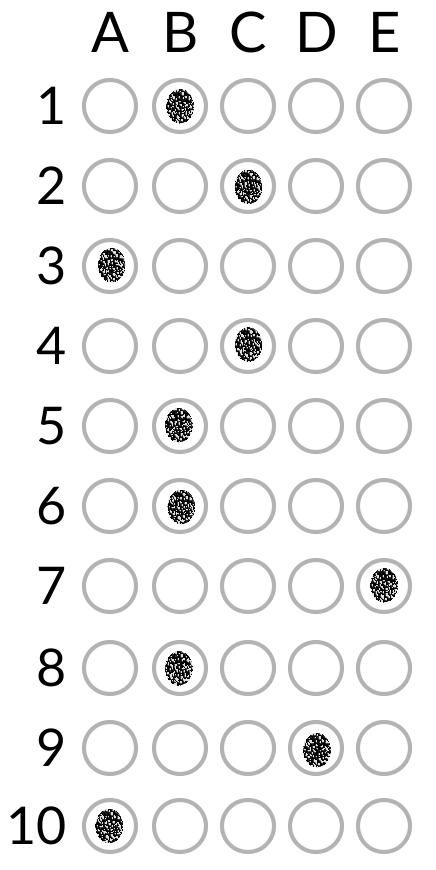

In [3]:
image = cv2.imread('/content/answers_1.png')
cv2_imshow(image)

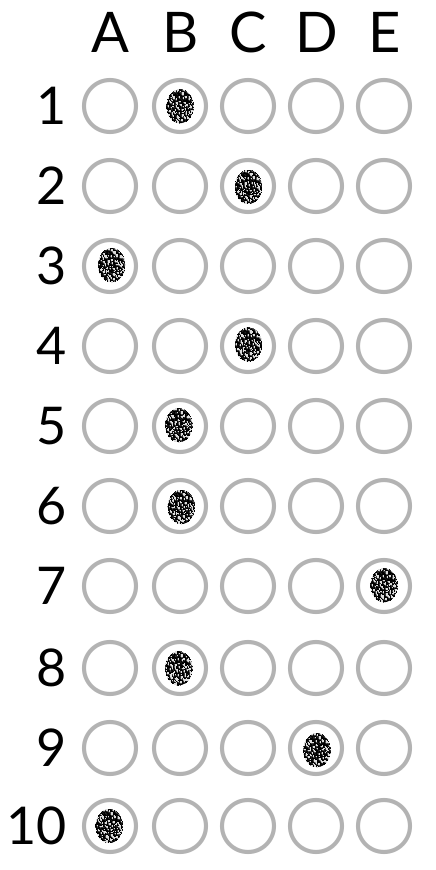

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

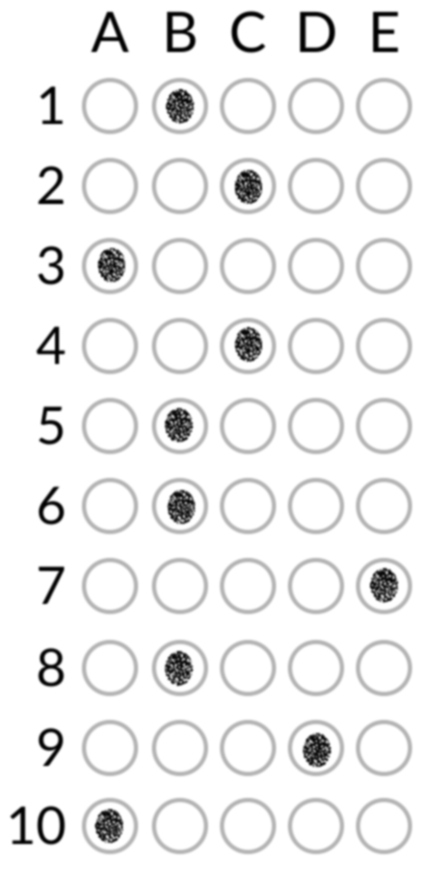

In [5]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blurred)

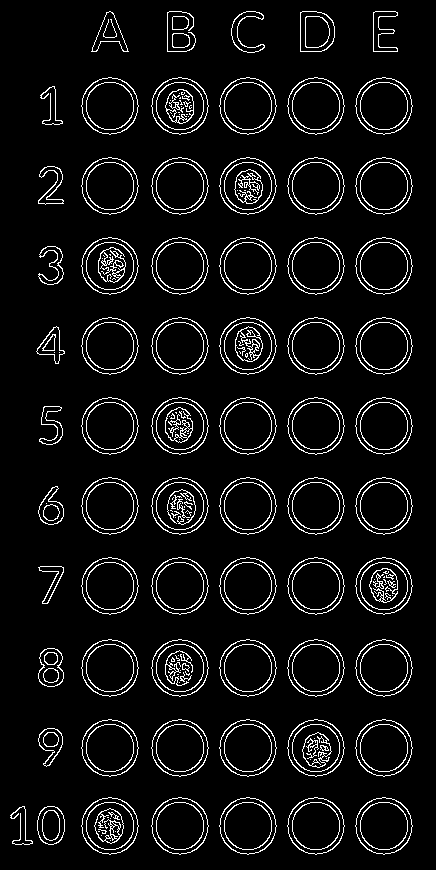

In [6]:
thresh = cv2.Canny(blurred, 70, 70)
cv2_imshow(thresh)

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
len(cnts)

68

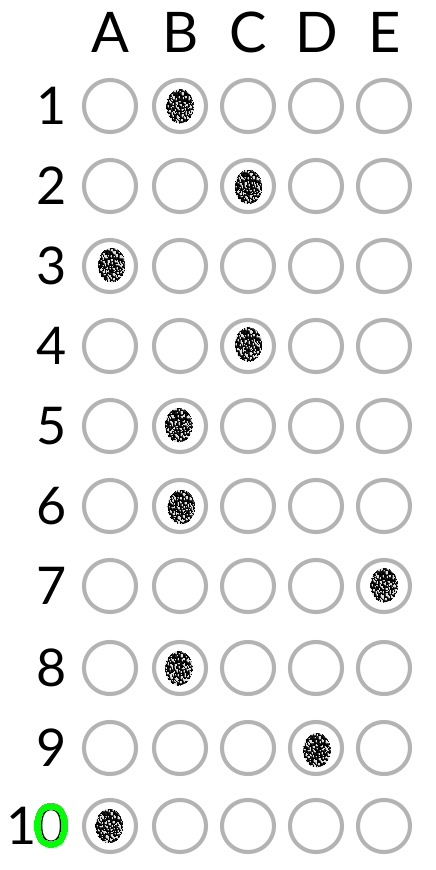

In [8]:
cnt1 = cv2.drawContours(image.copy(), [cnts[0]], -1, (0, 255, 0), 5)
cv2_imshow(cnt1)

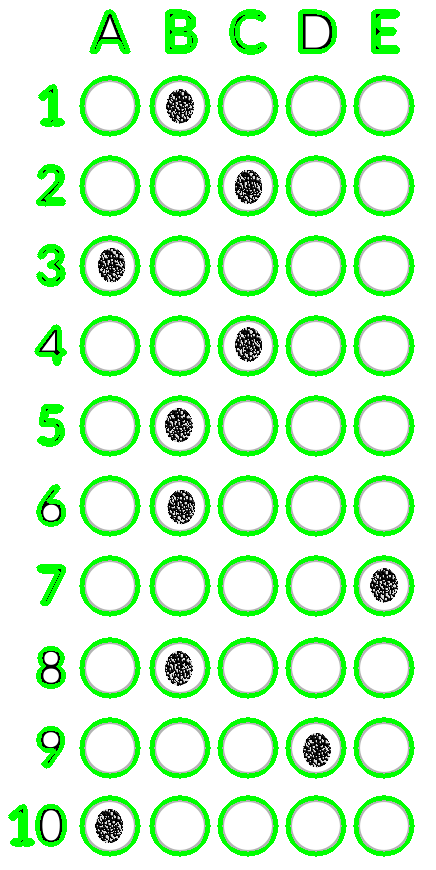

In [9]:
cnt_img = image.copy()
for contour in cnts:
  cv2.drawContours(cnt_img, [contour], -1, (0, 255, 0), 3)

cv2_imshow(cnt_img)

# **WYDOBYCIE ODPOWIEDNICH KONTURÓW**

Liczba pól z odpowiedziami: 50


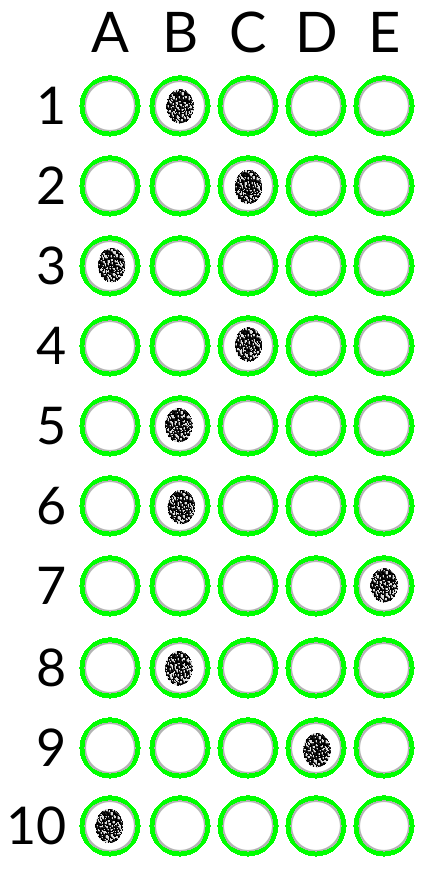

In [10]:
question_contours = []

for contour in cnts:
  (x, y, w, h) = cv2.boundingRect(contour)
  ar = w / float(h)

  if w >= 50 and h >= 50 and ar > 0.9 and ar < 1.1:
    question_contours.append(contour)

print(f'Liczba pól z odpowiedziami: {len(question_contours)}')

cnt_img = image.copy()
for contour in question_contours:
  cv2.drawContours(cnt_img, [contour], -1, (0, 255, 0), 3)

cv2_imshow(cnt_img)

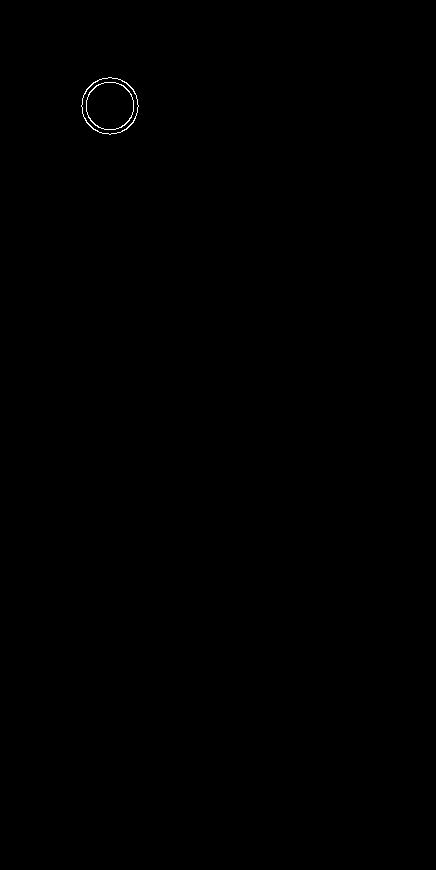

(375, 0)
1


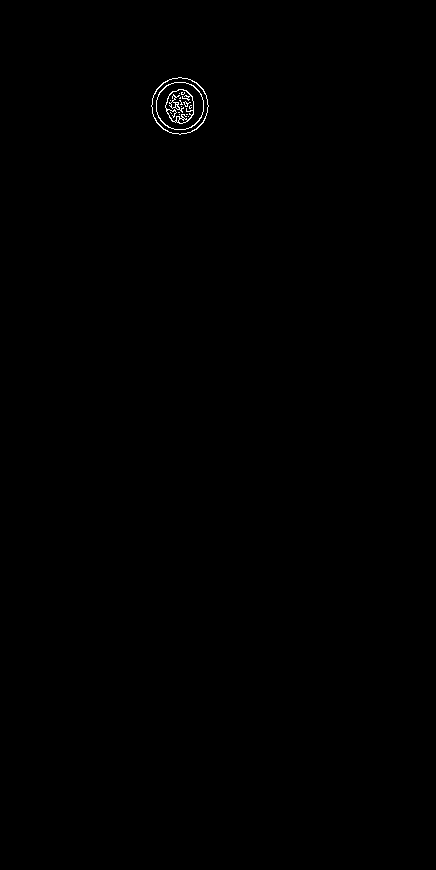

(702, 1)
1


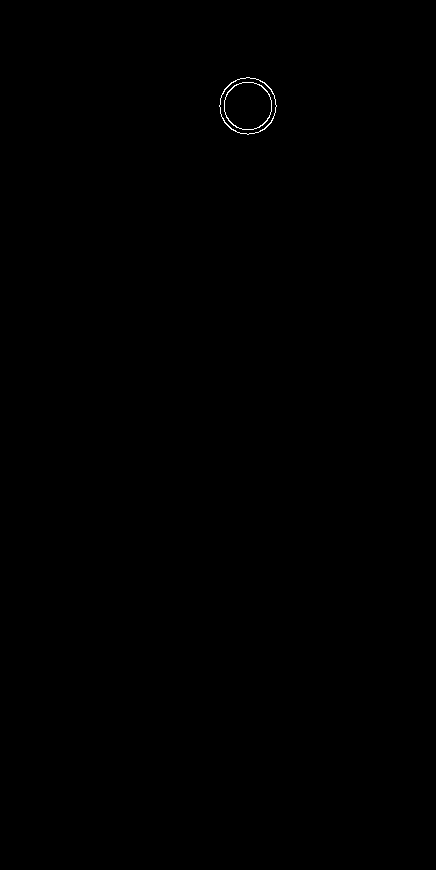

(702, 1)
1


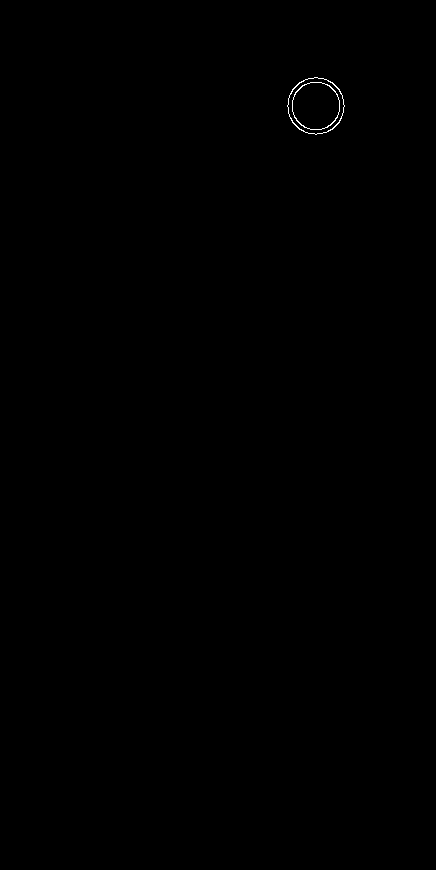

(702, 1)
1


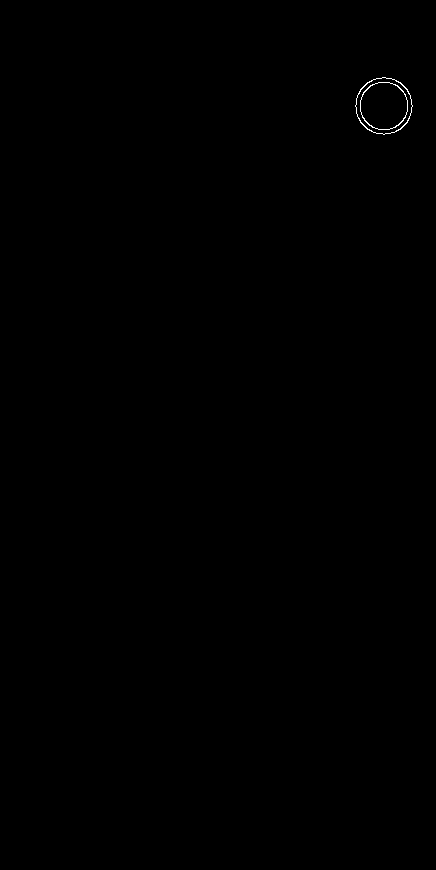

(702, 1)
1


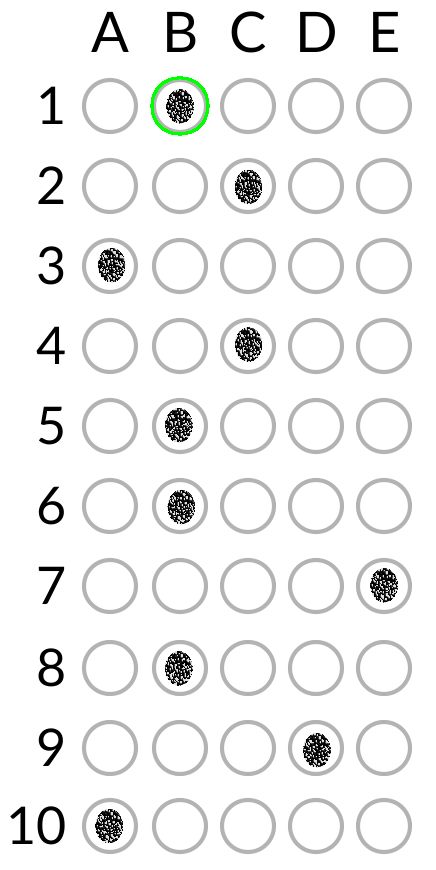

In [11]:
# sortowanie kontur od góry do dołu
question_top_bottom = imutils.contours.sort_contours(question_contours, method='top-to-bottom')[0]

# wydobycie pierwszych 5 kontur i sortowanie od lewej do prawej
first_5 = question_top_bottom[:5]
first_5_left_right = imutils.contours.sort_contours(first_5, method='left-to-right')[0]

img = image.copy()

marked = None

for idx, contour in enumerate(first_5_left_right):
    # tworzymy maskę z samych zer
    mask = np.zeros(thresh.shape, 'uint8')

    # rysujemy kontur na masce
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # przeprowadzamy operację bitwise_and na obrazie thresh
    mask = cv2.bitwise_and(thresh, thresh, mask=mask)
    cv2_imshow(mask)

    # zliczamy liczbę pikseli niezerowych
    total = cv2.countNonZero(mask)


    if marked is None or total > marked[0]:
        marked = (total, idx)
    print(marked) 
    
    # kolor czerwony
    color = (0, 0, 255)
         
    key = ANSWER_KEY[0]
    print(key)

    if key == marked[1]:
        # zaznacz na kolor zielony
        color = (0, 255, 0)

cv2.drawContours(img, [first_5_left_right[key]], -1, color, 2)
cv2_imshow(img)

# **ROZWIĄZANIE DLA WSZYSTKICH PYTAŃ**

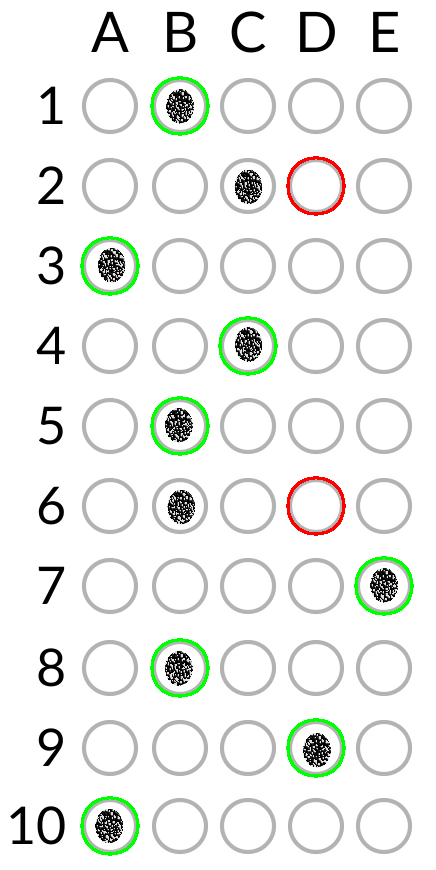

In [12]:
img = image.copy()

correct = 0

# sortowanie od góry do dołu
question_top_bottom = imutils.contours.sort_contours(question_contours, method='top-to-bottom')[0]

for question, idx in enumerate(range(0, len(question_contours), 5)):

  # wydobycie pierwszych 5 kontur i posortowanie od lewej do prawej
  fields = question_top_bottom[idx : idx + 5]
  fields = imutils.contours.sort_contours(fields, method='left-to-right')[0]

  marked = None

  for cnt_idx, contour in enumerate(fields):
    # tworzymy maskę z samych zer
    mask = np.zeros(thresh.shape, dtype='uint8')

    # rysujemy kontur na masce
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # przeprowadzamy operację bitwise_and na obrazie thresh
    mask = cv2.bitwise_and(thresh, thresh, mask=mask)

    # zliczamy ilość pixeli niezerowych
    total = cv2.countNonZero(mask)

    if marked is None or total > marked[0]:
      marked = (total, cnt_idx)

  color = (0, 0, 255)

  key = ANSWER_KEY[question]

  if key == marked[1]:
    color = (0, 255, 0)
    correct += 1

  cv2.drawContours(img, [fields[key]], -1, color, 2)

cv2_imshow(img)

# **WYŚWIETLANIE ROZWIĄZANIA**

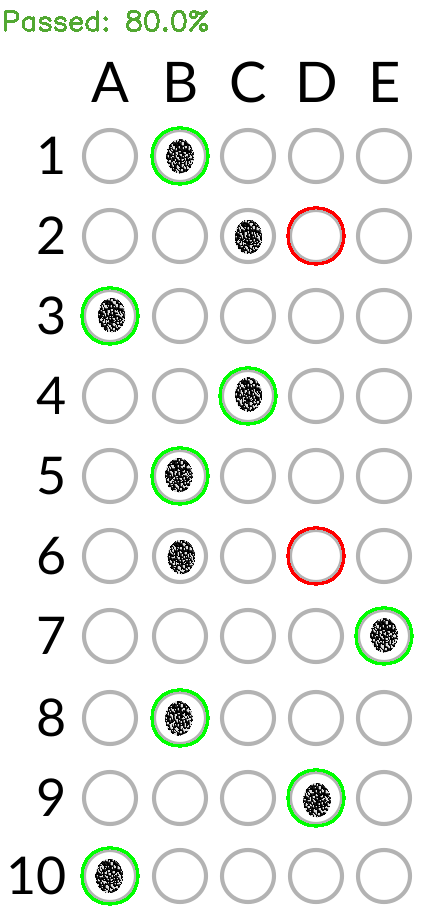

In [13]:
checked = cv2.copyMakeBorder(img, 50, 0, 0, 0, cv2.BORDER_CONSTANT, value=(255, 255, 255))
score = (correct / 10)

color = (50, 168, 82) if score >= 0.6 else (71, 7, 219)
text = 'Passed' if score >= 0.6 else 'Failed'

cv2.putText(img=checked, text=f'{text}: {score * 100}%', org=(1, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.9, color=color, thickness=2)
cv2_imshow(checked)